In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math
from random import randint as rint
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#### Q1. Consider a periodic square wave with time period T = 2 seconds having magnitude 1 between t = 0 s and t = 1 s and zero elsewhere. Let g(t) be the Fourier series representation of the square wave.
(a) Define a function so that you can easily plot g(t) for different numbers of coefficients on the same graph. This plot is useful to see the
emergence of the square wave as the number of terms in the representation increases.

(b) What happens to the Gibbs phenomenon when the number of
terms becomes large?


#### Define Fourier Series

In [2]:
def Fourier_Series(x,N,P,tot):
    u=1/(tot*P)
    a=np.empty([N])
    b=np.empty([N])
    normalize=len(x)/seconds
    for i in range(N):
        a[i]=0
        b[i]=0
        for j in range(len(x)):
            a[i]+=x[j]*np.cos(2*np.pi*j*i/(normalize*P))
            b[i]+=x[j]*np.sin(2*np.pi*j*i/(normalize*P))
        if i==0:
            a[i]*=u
        else:
            a[i]*=2*u
        b[i]*=2*u
    return a,b

#### Define Inverse Fourier Series

In [3]:
def Inverse_Fourier_Series(a,b,T):
    y=np.empty([num*seconds])
    normalize=len(y)/seconds
    for t in range(len(y)):
        y[t]=0
        for m in range(len(a)):
            y[t]+=a[m]*np.cos(2*np.pi*m*t/(normalize*T))+b[m]*np.sin(2*np.pi*m*t/(normalize*T))
    return(y)

In [18]:
num=1000
seconds=int(input("Enter the number of seconds for which you want the output of square wave to be shown\n"))
Period=int(input("Enter the period of square wave\n"))
def plotfig(x,y,x_label,y_label,title,fig,labl):
    plt.figure(fig,figsize=(15,6))
    global num
    plt.plot(x,y,label=labl)
    plt.xlabel(x_label)
    plt.grid('true')
    plt.ylabel(y_label)
    plt.legend()
    plt.title(title)
    t=np.arange(0,seconds,1/num)


Enter the number of seconds for which you want the output of square wave to be shown
3
Enter the period of square wave
2


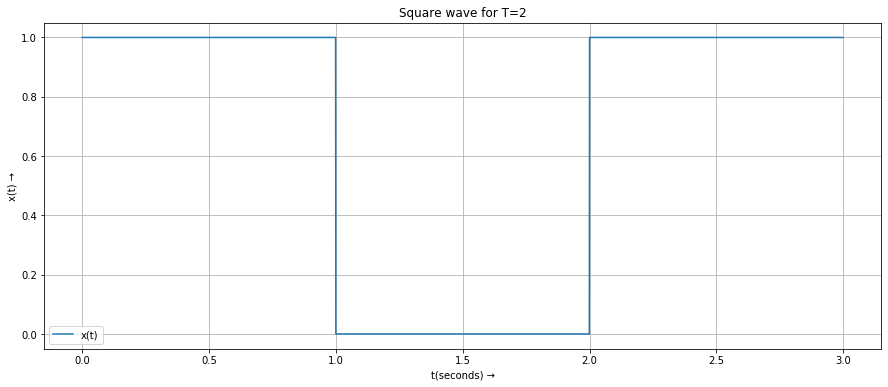

In [19]:
t=np.arange(0,seconds,1/num)
x=np.empty([num*seconds])
fig=1
tot=0
for i in range(num*seconds):
    if int(i/num)%Period<1:
        x[i]=1
    else:
        x[i]=0
    tot+=x[i]
xlabel="t(seconds) →"
ylabel="x(t) →"
title="Square wave for T=2"
labl="x(t)"
plotfig(t,x,xlabel,ylabel,title,fig,labl)
fig+=1
ylabel="g(t) →"
coef=[]
print()

Enter the list of coefficient values you want on the plot. when finished enter '0'
5
Enter the list of coefficient values you want on the plot. when finished enter '0'
4
Enter the list of coefficient values you want on the plot. when finished enter '0'
7
Enter the list of coefficient values you want on the plot. when finished enter '0'
2
Enter the list of coefficient values you want on the plot. when finished enter '0'
9
Enter the list of coefficient values you want on the plot. when finished enter '0'
22
Enter the list of coefficient values you want on the plot. when finished enter '0'
0


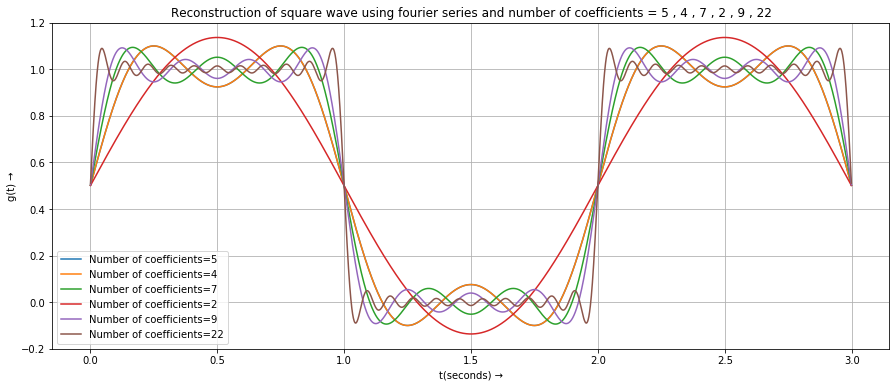

In [20]:
for i in range(100):
    v=int(input("Enter the list of coefficient values you want on the plot. when finished enter '0'\n"))
    if v==0:
        break
    else:
        coef.append(v)
coe=[]
for i in coef:
    coe.append(str(i))
s=' , '
coeff=s.join(coe)
a=[]
b=[]
title="Reconstruction of square wave using fourier series and number of coefficients = "+coeff
for i in coef:
    a,b=Fourier_Series(x,i,Period,tot)
    labl="Number of coefficients="+str(i)
    y=Inverse_Fourier_Series(a,b,Period)
    plotfig(t,y,xlabel,ylabel,title,fig,labl)

#### Q2. A signal is given as x(t) = cos2πf t where f = 30 Hz. The signal is sampled at 100 times per second for 0.99 seconds and then its DFT is computed.
(a) Plot the power spectral density and visualize the Spectral Leakage.

(b) Using various window functions such as Hanning, Hamming, Bartlett etc. try to minimize the Spectral Leakage. Show the plots in each case.

In [21]:
# defining the given signal:

x_n = []
f = 30
t = np.arange(0,.99,0.01)
for i in t:
    xt = np.cos(2*np.pi*f*i)
    x_n.append(xt)

#### Defining the function for calculation of DFT:

In [22]:
def DFT(x_n):
    N = len(x_n)-1
    dft = []
    for k in range(N):
        x = 0
        for n in range(N):
                a = x_n[n]*complex(np.cos(((2*np.pi)/N)*k*n),-np.sin(((2*np.pi)/N)*k*n))
                x = x+a                     
        dft.append(abs(x))
    return(dft)

print("The DFT of given sequence is =\n\n",DFT(x_n))

The DFT of given sequence is =

 [1.1180339887497937, 1.1192483306286138, 1.1229077394583724, 1.1290619364112504, 1.1377957331401793, 1.1492320824097233, 1.163536636355152, 1.1809241377446407, 1.201667123896769, 1.2261076372337645, 1.2546729439274908, 1.2878967149891143, 1.3264478073233406, 1.3711698371262944, 1.423136406726023, 1.4837295554838215, 1.5547535329593958, 1.638603804827476, 1.7385251807398363, 1.859019028073217, 2.006510574767215, 2.1904930282792106, 2.4255995445400003, 2.7356178822001103, 3.1619660492630817, 3.7837260070671785, 4.773031501424963, 6.588926375226068, 11.002046144060659, 37.48953179597594, 24.319201867722256, 8.868332872850461, 5.303347978743153, 3.7192350507394614, 2.824079852319058, 2.248812680939083, 1.8480985430722163, 1.5531610201058215, 1.3272930158128726, 1.1491803279373112, 1.0056730777361795, 0.8883057079230983, 0.7914845678733905, 0.711484958167053, 0.6458667871208151, 0.593113173939248, 0.5523833715998959, 0.5233145475595943, 0.5058370374461267, 0

#### Defining the hanning window:

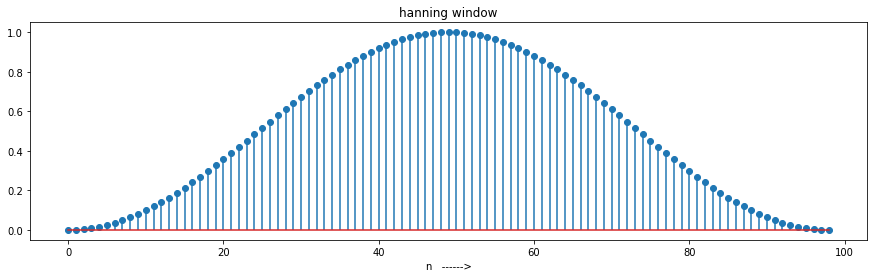

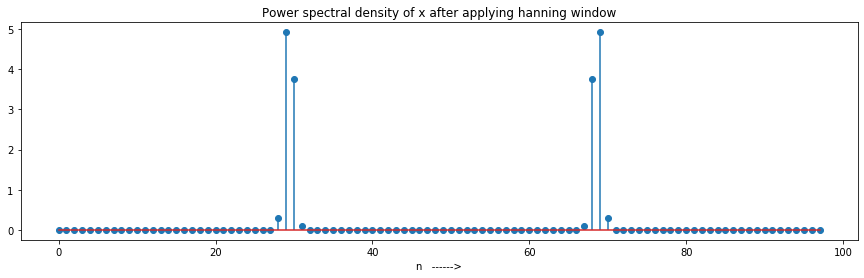

In [23]:
t = np.arange(0,.99,0.01)
def hann(M):
    H = []
    for i in range(M):
        H.append(0.5-0.5*np.cos( (2*np.pi*i)/(M-1) ))
    return np.array(H)

fig = plt.figure(1,figsize=(15,4))
plt.stem(hann(99),use_line_collection=True)
plt.xlabel("n   ------>")
plt.title("hanning window")

x = x_n * hann(99)
dft_x = DFT(x)
psd_x = []
for i in range(len(dft_x)):
    s = (dft_x[i]**2)
    psd_x.append(s/99)
fig = plt.figure(2,figsize=(15,4))
plt.stem(psd_x,use_line_collection=True)
plt.title("Power spectral density of x after applying hanning window")
plt.xlabel("n   ------>")
plt.show()

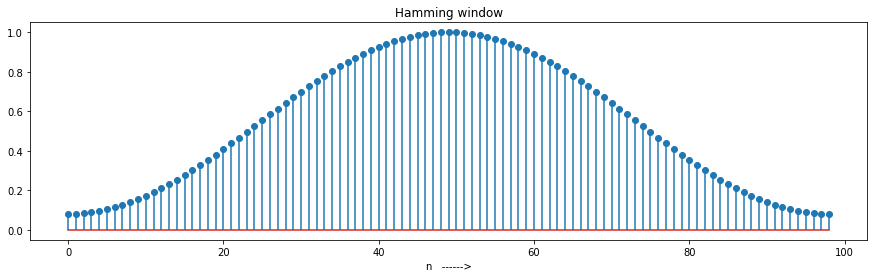

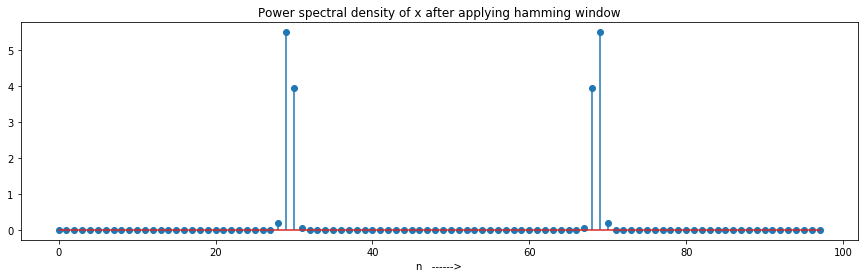

In [9]:
# Defining the hamming window:

def hamm(M):
    H=[]
    for i in range(M):
        H.append(0.54-0.46*np.cos( (2*np.pi*i)/(M-1) ))
    return np.array(H)

fig = plt.figure(1,figsize=(15,4))
plt.stem(hamm(99),use_line_collection=True)
plt.xlabel("n   ------>")
plt.title("Hamming window")
plt.show()

x = x_n * hamm(99)
dft_x = DFT(x)
psd_x = []
for i in range(len(dft_x)):
    s = (dft_x[i]**2)
    psd_x.append(s/99)
fig = plt.figure(2,figsize=(15,4))
plt.stem(psd_x,use_line_collection=True)
plt.title("Power spectral density of x after applying hamming window")
plt.xlabel("n   ------>")
plt.show()

#### Defining the bartlett window:

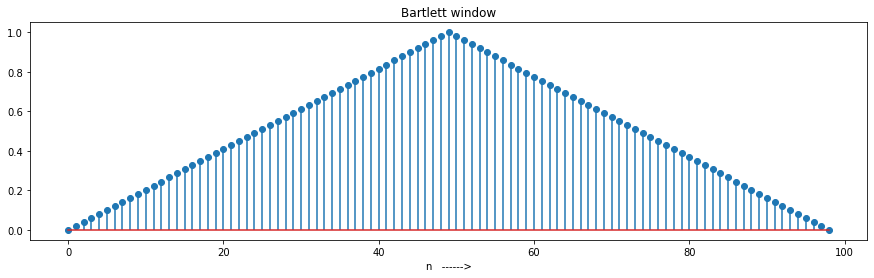

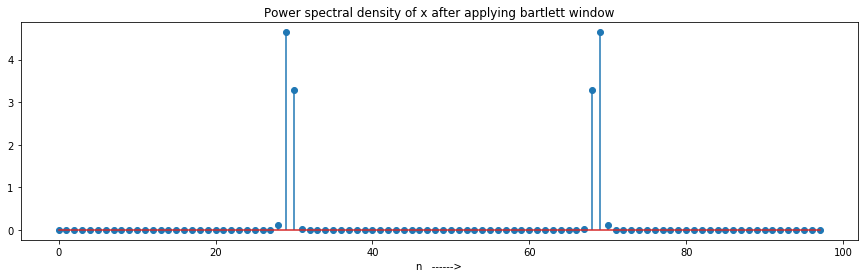

In [24]:
def bart(M):
    B=[]
    m=(M-1)/2
    for i in range(M):
        B.append( (1/m)*(m-abs(i-m)) )
    return np.array(B)
fig = plt.figure(1,figsize=(15,4))
plt.stem(bart(99),use_line_collection=True)
plt.xlabel("n   ------>")
plt.title("Bartlett window")

x = x_n * bart(99)
dft_x = DFT(x)
psd_x = []
for i in range(len(dft_x)):
    s = (dft_x[i]**2)
    psd_x.append(s/99)
fig = plt.figure(2,figsize=(15,4))
plt.stem(psd_x,use_line_collection=True)
plt.title("Power spectral density of x after applying bartlett window")
plt.xlabel("n   ------>")
plt.show()

#### 3. Consider the signal x(t) = cos(2πf1t) + cos(2πf2t) where f1 = 10 Hz and f2 = 30 Hz. The signal y(t) is the noisy version of x(t) when x(t) is corrupted with white noise having zero mean and unit variance.
(a) Find the power spectral density of y(t) and show a labelled plot.

(b) From the PSD, find a suitable threshold for denoising the signal.

(c) Recover x(t) from y(t) using the threshold. Show the necessary plots.

#### Plot signal x(t) = cos(2πf1t) + cos(2πf2t) :

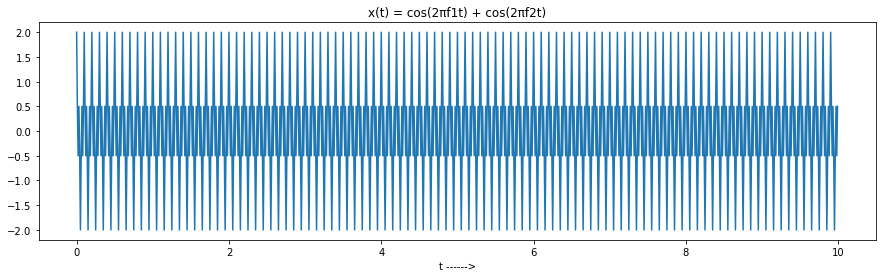

In [11]:
f1 = 10
f2 = 30
t = np.arange(0,10,0.01)
xt = []
for i in t:
    u = np.cos(2*np.pi*f1*i) + np.cos(2*np.pi*f2*i)
    xt.append(u)
    
fig = plt.figure(1,figsize=(15,4))
plt.plot(t,xt)
plt.title("x(t) = cos(2πf1t) + cos(2πf2t)")
plt.xlabel("t ------>")
plt.show()

#### Noisy version of x(t):

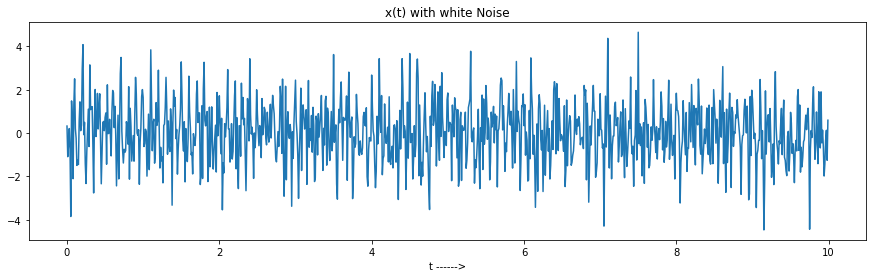

In [12]:
mean = 0
std = 1
N = 1000
white_noise = np.random.normal(mean, std, N)
y=xt+white_noise

fig = plt.figure(1,figsize=(15,4))
plt.plot(t,y)
plt.title("x(t) with white Noise")
plt.xlabel("t ------>")
plt.show()

#### Power spectral density of y(t) 

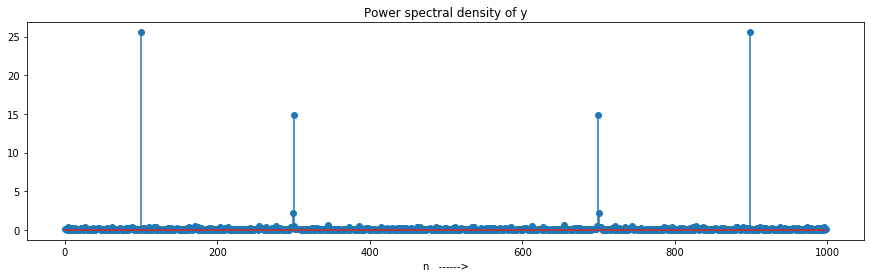

In [13]:
psd_y = []
dft_y = DFT(y)
for i in range(999):
    s = (dft_y[i]**2)
    psd_y.append(s/10000)
fig = plt.figure(1,figsize=(15,4))
plt.stem(psd_y,use_line_collection=True)
plt.title("Power spectral density of y")
plt.xlabel("n   ------>")
plt.show()

#### Recover x(t) from y(t) using the threshold

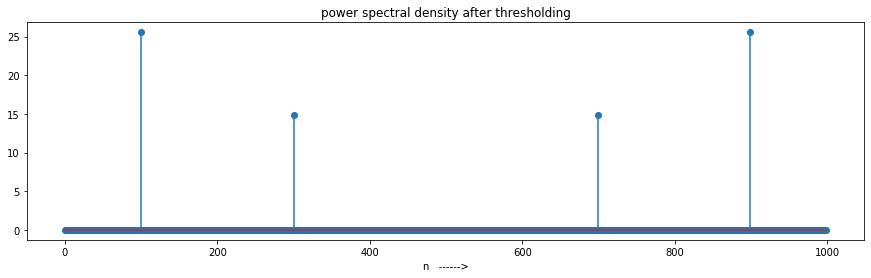

In [25]:
filter = []
threshold = 5
for i in range(len(psd_y)):
    if psd_y[i] >threshold:
            filter.append(psd_y[i])
    else:
        filter.append(0)
fig = plt.figure(1,figsize=(15,4))
plt.stem(filter,use_line_collection=True)
plt.title("power spectral density after thresholding")
plt.xlabel("n   ------>")
plt.show()

C:\Users\me\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


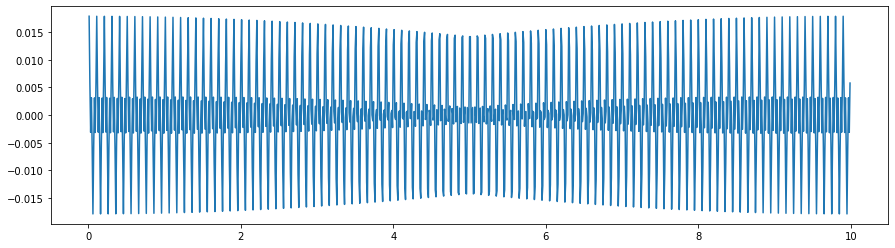

In [26]:
idft_filter = []
N = len(filter)
t = np.arange(0.01,10,0.01)

for n in range(N):
    x = 0
    for k in range(N):
            a = np.sqrt(filter[k])*complex(np.cos(((2*np.pi)/N)*n*k),np.sin(((2*np.pi)/N)*k*n))
            x = x+a                     
    idft_filter.append(x/N)
fig = plt.figure(1,figsize=(15,4))
plt.plot(t,idft_filter)